In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('height-weight.csv')
data.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [3]:
data.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


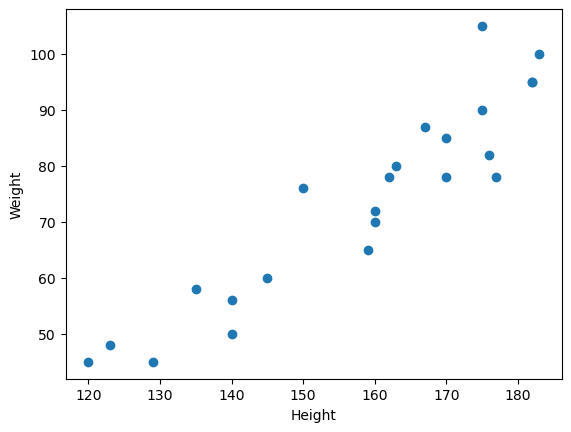

In [7]:
import matplotlib.pyplot as plt
plt.scatter(x=data['Height'],y=data['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [9]:
data.corr()   ## shows high correlation

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


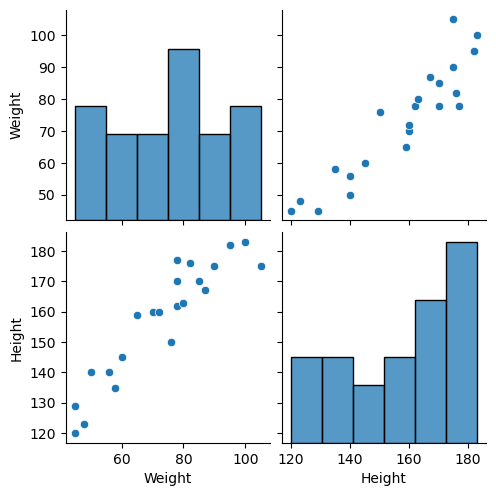

In [10]:
import seaborn as sns
sns.pairplot(data)

In [14]:
import numpy as np
X = data[['Weight']]

Y = data['Height']


In [13]:
from sklearn.model_selection import train_test_split

In [31]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.5,random_state=40)

In [32]:
## if there would be multiple numerical columns , need to do a standardScalar , here it is not required
from sklearn.linear_model import LinearRegression
reg = LinearRegression(n_jobs=-1) #no. of workers 

In [33]:
model = reg.fit(X_train , Y_train)

In [19]:
print("intercept of model line" , model.intercept_ , "\n slope of the fitted line " , model.coef_)

intercept of model line 81.55054015000341 
 slope of the fitted line  [1.01448428]


In [34]:
y_pred = model.predict(X_test)



In [35]:
from sklearn.metrics import root_mean_squared_error , r2_score
print ('rmse' , root_mean_squared_error(Y_test,y_pred) , 'r2 score' , r2_score(Y_test , y_pred))

rmse 8.457380838548577 r2 score 0.8079911665390116


## Multiple Linear Regression

In [36]:
data2 = pd.read_csv('economic_index.csv')
data2.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [37]:
data2.drop(columns=['year','Unnamed: 0','month'],inplace=True)

In [38]:
data2.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [39]:
data2.isna().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

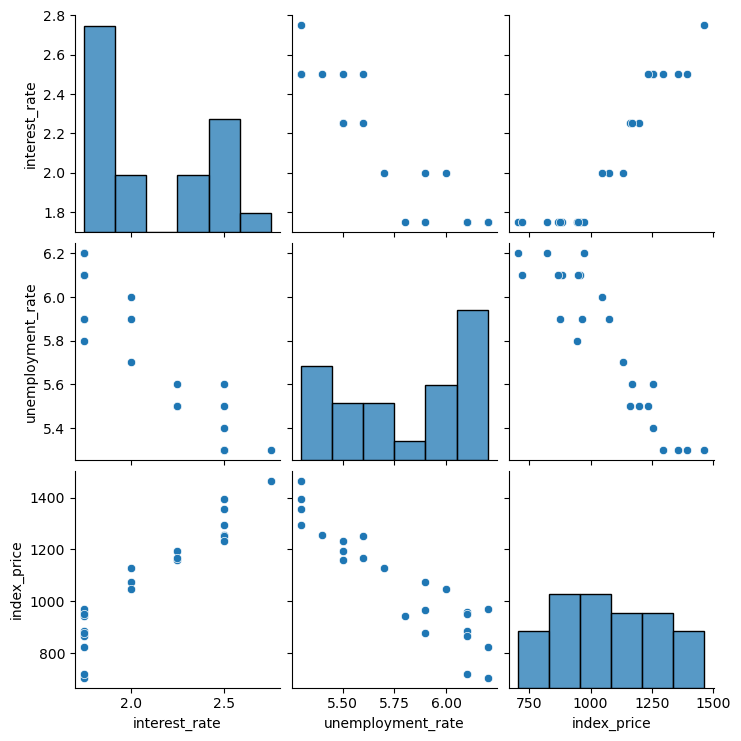

In [ ]:
sns.pairplot(data2)  ## shows linear relation with both of the features

In [ ]:
Y = data2['index_price']
X = data2.drop(columns=['index_price'])

In [41]:
data2.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calculate VIF
def calculate_vif(dataframe):
    X = add_constant(dataframe)  # statsmodels requires constant for VIF
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) 
                       for i in range(X.shape[1])]
    return vif_data

vif_results = calculate_vif(data2[['interest_rate', 'unemployment_rate']])
print(vif_results)

"""
Interpretation:
VIF = 1: No correlation
VIF = 1-5: Moderate correlation (usually acceptable)
VIF = 5-10: High correlation (concerning)
VIF > 10: Severe multicollinearity (needs fixing)
"""

             Feature          VIF
0              const  3897.889372
1      interest_rate     6.999417
2  unemployment_rate     6.999417


'\nInterpretation:\nVIF = 1: No correlation\nVIF = 1-5: Moderate correlation (usually acceptable)\nVIF = 5-10: High correlation (concerning)\nVIF > 10: Severe multicollinearity (needs fixing)\n'

In [49]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X = std.fit_transform(X)

In [50]:
X2_train , X2test , y2train , y2test = train_test_split(X,Y , test_size=0.3 , random_state=40)


In [51]:
model = reg.fit(X2_train,y2train)

In [53]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(model , X2_train , y2train , scoring='neg_mean_squared_error' , cv=3)

In [56]:
np.mean(val_score)

np.float64(-48.068643354805964)

In [57]:
y2_pred = model.predict(X2test)
print('r2 score is ' , r2_score(y2test , y2_pred))

r2 score is  0.3093602758137082


## Polynomial Regresssion 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2 , include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly= poly.fit_transform(X_test)



## converting poynomial data 



## pipeline concepts

In [58]:
from sklearn.pipeline import Pipeline

In [ ]:
def poly_regression(degree):
    {
    x_new = np.linspace(-3,3,200).reshape(200,1)

    poly = PolynomialFeatures(degree=degree , include_bias=True)
    reg = LinearRegression()
    poly_regression = Pipeline([
        ('poly_features',poly),('linear_regression',reg)

    ])

    poly_regression.fit(X_train,Y_train)
    y_pred_new = poly_regression.predict(x_new)

    plt.plot(x_new,y_pred_new,'r',label="degree" + str(degree) , linewidth = 2)
    }
